<a href="https://colab.research.google.com/github/seok-young/seok-young/blob/master/digit_recognizer.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import numpy as np # linear algebra
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
# import warnings
import warnings
# filter warnings
warnings.filterwarnings('ignore')

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


# DATA LOAD

In [3]:
# train = pd.read_csv("./datasets/train.csv")
# test = pd.read_csv("./datasets/test.csv")
# print(train.shape)
# train.head(2)

In [4]:
train = pd.read_csv("/content/drive/MyDrive/Colab Notebooks/CNN_digit_recognizer/datasets/train.csv")
test = pd.read_csv("/content/drive/MyDrive/Colab Notebooks/CNN_digit_recognizer/datasets/test.csv")
# /content/drive/MyDrive/Colab Notebooks/CNN_digit_recognizer/datasets/test.csv
print(train.shape)
train.head(2)

(42000, 785)


,label,pixel0,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,...,pixel774,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783
0,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [5]:
print(test.shape)
test.head(2)

(28000, 784)


,pixel0,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,...,pixel774,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


Text(0.5, 1.0, 'Number of digit classes')

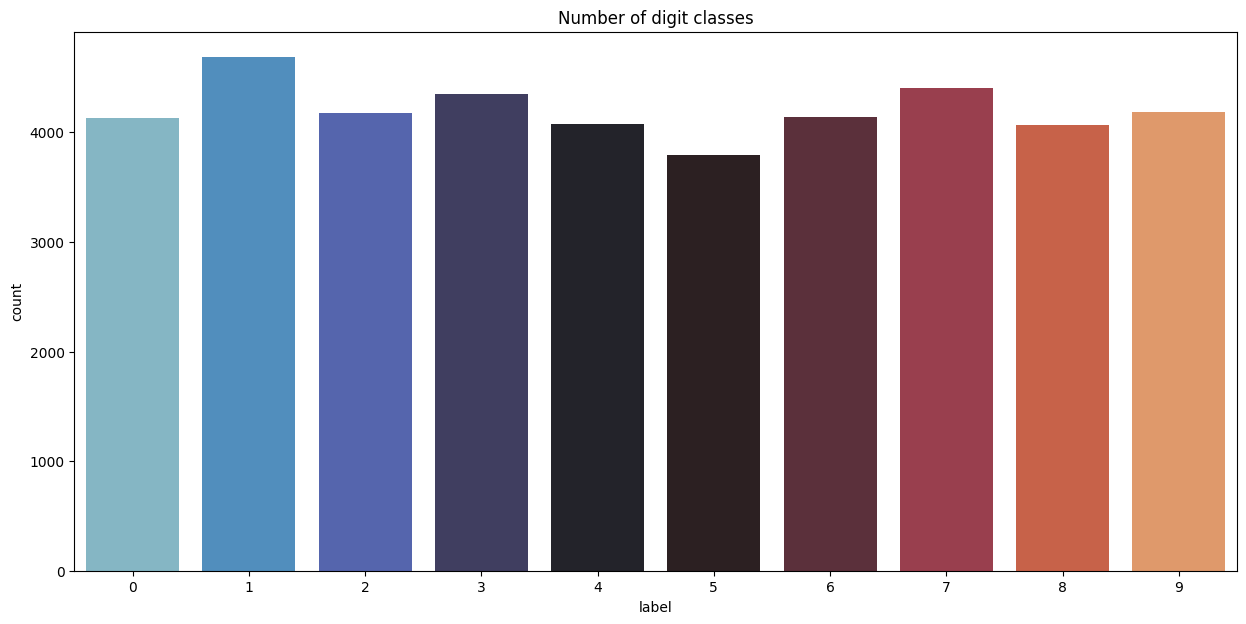

In [6]:
plt.figure(figsize=(15,7))
g = sns.countplot(train,x= train["label"], palette="icefire")
plt.title("Number of digit classes")

In [7]:
Y_train = train["label"]
X_train = train.drop(labels = ["label"],axis = 1)

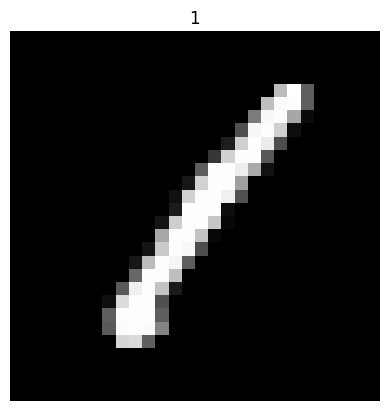

In [8]:
img = X_train.iloc[0].values
img = img.reshape((28,28))
plt.imshow(img,cmap='gray')
plt.title(train.iloc[0,0])
plt.axis("off")
plt.show()

# FEATURE ENGINEERING

## NORMALIZATION

In [9]:
X_train = X_train / 255.0
test = test / 255.0
print("x_train shape: ",X_train.shape)
print("test shape: ",test.shape)

x_train shape:  (42000, 784)
test shape:  (28000, 784)


## RESHAPE

In [10]:
X_train = X_train.values.reshape(-1,28,28,1)
test = test.values.reshape(-1,28,28,1)
print("x_train shape: ",X_train.shape)
print("test shape: ",test.shape)

x_train shape:  (42000, 28, 28, 1)
test shape:  (28000, 28, 28, 1)


## LABEL ENCODING

In [12]:
from keras.utils import to_categorical # convert to one-hot-encoding
Y_train = to_categorical(Y_train, num_classes = 10)

# Forecasting

## TRAIN-TEST SPLIT

In [13]:
from sklearn.model_selection import train_test_split
X_train, X_val, Y_train, Y_val = train_test_split(X_train, Y_train, test_size = 0.1, random_state=2)
print("x_train shape",X_train.shape)
print("x_test shape",X_val.shape)
print("y_train shape",Y_train.shape)
print("y_test shape",Y_val.shape)

x_train shape (37800, 28, 28, 1)
x_test shape (4200, 28, 28, 1)
y_train shape (37800, 10)
y_test shape (4200, 10)


In [21]:
# X_train[2]

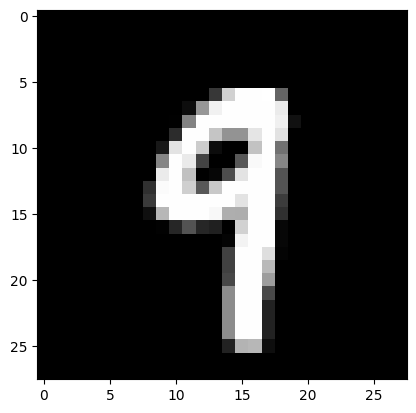

In [14]:
plt.imshow(X_train[2][:,:,0],cmap='gray')
plt.show()

## CNN

<img src="https://i.ibb.co/8rcnyFN/gec2.jpg">

In [23]:
from sklearn.metrics import confusion_matrix
import itertools

from keras.models import Sequential
from keras.layers import Dense, Dropout, Flatten, Conv2D, MaxPool2D
from keras.optimizers import RMSprop,Adam
from keras.preprocessing.image import ImageDataGenerator
from keras.callbacks import ReduceLROnPlateau

model = Sequential()
#
model.add(Conv2D(filters = 8, kernel_size = (5,5),padding = 'Same',
                 activation ='relu', input_shape = (28,28,1)))
model.add(MaxPool2D(pool_size=(2,2)))
model.add(Dropout(0.25))
#
model.add(Conv2D(filters = 16, kernel_size = (3,3),padding = 'Same',
                 activation ='relu'))
model.add(MaxPool2D(pool_size=(2,2), strides=(2,2)))
model.add(Dropout(0.25))
# fully connected
model.add(Flatten())
model.add(Dense(256, activation = "relu"))
model.add(Dropout(0.5))
model.add(Dense(10, activation = "softmax"))

In [25]:
optimizer = Adam(learning_rate=0.001, beta_1=0.9, beta_2=0.999)

## COMPILE MODEL

## CATEGORICAL CROSSENTROPY

<IMG SRC = "https://i.ibb.co/qW299Dr/cce.jpg">

In [26]:
model.compile(optimizer = optimizer , loss = "categorical_crossentropy", metrics=["accuracy"])

## EPOCH & BATCH SIZE

In [27]:
epochs = 10  # for better result increase the epochs
batch_size = 250

## DATA AUGMENTATION

In [28]:
datagen = ImageDataGenerator(
        featurewise_center=False,  # set input mean to 0 over the dataset
        samplewise_center=False,  # set each sample mean to 0
        featurewise_std_normalization=False,  # divide inputs by std of the dataset
        samplewise_std_normalization=False,  # divide each input by its std
        zca_whitening=False,  # dimesion reduction
        rotation_range=5,  # randomly rotate images in the range 5 degrees
        zoom_range = 0.1, # Randomly zoom image 10%
        width_shift_range=0.1,  # randomly shift images horizontally 10%
        height_shift_range=0.1,  # randomly shift images vertically 10%
        horizontal_flip=False,  # randomly flip images
        vertical_flip=False)  # randomly flip images

datagen.fit(X_train)

In [29]:
history = model.fit_generator(datagen.flow(X_train,Y_train, batch_size=batch_size),
                              epochs = epochs, validation_data = (X_val,Y_val), steps_per_epoch=X_train.shape[0] // batch_size)

Epoch 1/10
151/151 [==============================] - 37s 234ms/step - loss: 1.1557 - accuracy: 0.6132 - val_loss: 0.2568 - val_accuracy: 0.9371
Epoch 2/10
151/151 [==============================] - 32s 211ms/step - loss: 0.4797 - accuracy: 0.8471 - val_loss: 0.1403 - val_accuracy: 0.9576
Epoch 3/10
151/151 [==============================] - 33s 219ms/step - loss: 0.3474 - accuracy: 0.8907 - val_loss: 0.1169 - val_accuracy: 0.9636
Epoch 4/10
151/151 [==============================] - 32s 211ms/step - loss: 0.2864 - accuracy: 0.9114 - val_loss: 0.1006 - val_accuracy: 0.9676
Epoch 5/10
151/151 [==============================] - 32s 211ms/step - loss: 0.2507 - accuracy: 0.9213 - val_loss: 0.0889 - val_accuracy: 0.9717
Epoch 6/10
151/151 [==============================] - 32s 211ms/step - loss: 0.2259 - accuracy: 0.9288 - val_loss: 0.0836 - val_accuracy: 0.9731
Epoch 7/10
151/151 [==============================] - 32s 214ms/step - loss: 0.2126 - accuracy: 0.9357 - val_loss: 0.0816 - val_ac

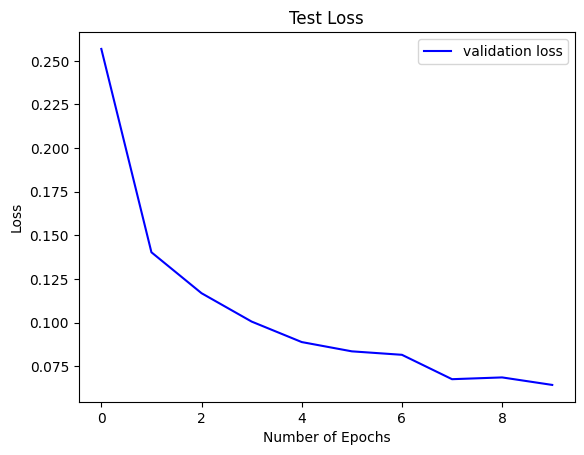

In [30]:
plt.plot(history.history['val_loss'], color='b', label="validation loss")
plt.title("Test Loss")
plt.xlabel("Number of Epochs")
plt.ylabel("Loss")
plt.legend()
plt.show()

132/132 [==============================] - 3s 20ms/step


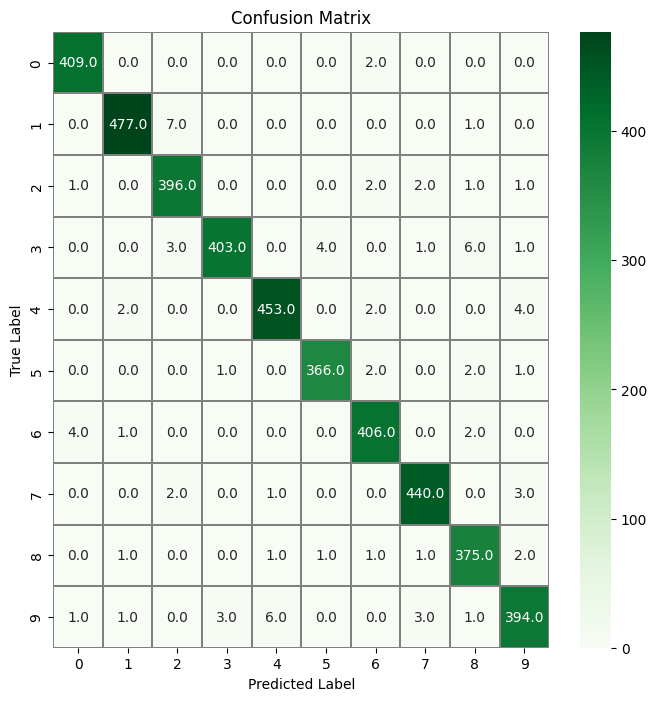

In [31]:
# confusion matrix
import seaborn as sns
# Predict the values from the validation dataset
Y_pred = model.predict(X_val)
# Convert predictions classes to one hot vectors
Y_pred_classes = np.argmax(Y_pred,axis = 1)
# Convert validation observations to one hot vectors
Y_true = np.argmax(Y_val,axis = 1)
# compute the confusion matrix
confusion_mtx = confusion_matrix(Y_true, Y_pred_classes)
# plot the confusion matrix
f,ax = plt.subplots(figsize=(8, 8))
sns.heatmap(confusion_mtx, annot=True, linewidths=0.01,cmap="Greens",linecolor="gray", fmt= '.1f',ax=ax)
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.title("Confusion Matrix")
plt.show()